### Import libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [4]:
df=pd.read_csv("data/Fraud_Dataset.csv")

In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [8]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [9]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
df.shape

(6362620, 11)

In [11]:
df["isFraud"].value_counts()[1]/df.shape[0]*100

np.float64(0.12908204481801522)

## Percentage of fraud transaction - 0.129%

Text(0, 0.5, 'Count')

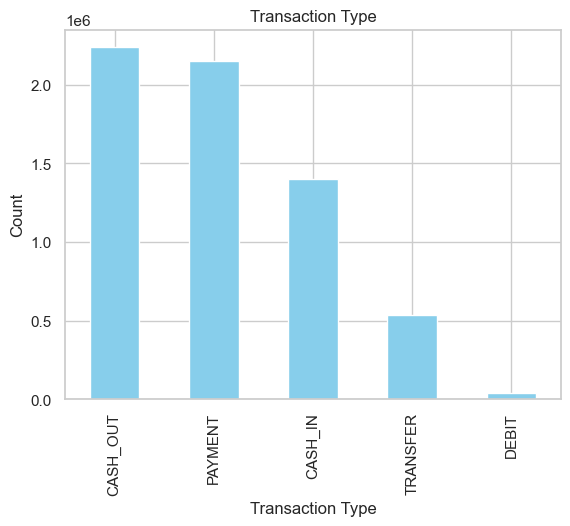

In [12]:
df["type"].value_counts().plot(kind="bar",title="Transaction Type",color="skyblue")
plt.xlabel("Transaction Type")
plt.ylabel("Count")

## Fraud rate by type

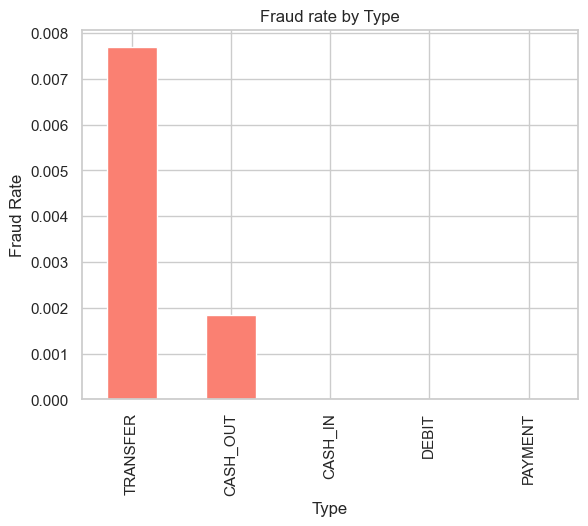

In [13]:
fraud_by_type=df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind="bar",title="Fraud rate by Type",color="salmon")
plt.ylabel("Fraud Rate")
plt.xlabel("Type")
plt.show()

In [14]:
fraud_by_type

type
TRANSFER    0.007688
CASH_OUT    0.001840
CASH_IN     0.000000
DEBIT       0.000000
PAYMENT     0.000000
Name: isFraud, dtype: float64

#### Amount

In [15]:
df["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

<Axes: xlabel='amount', ylabel='Count'>

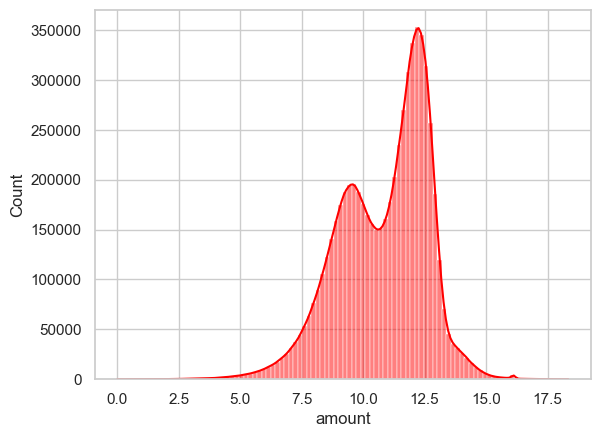

In [16]:
sns.histplot(np.log1p(df["amount"]),bins=100,kde=True,color="red")

#np.log1p applies log transform if the value contains zero or very large value

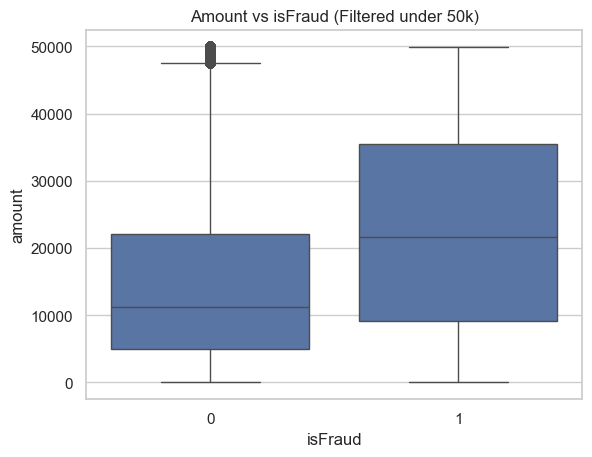

In [17]:
sns.boxplot(data=df[df["amount"]<50000],x="isFraud",y="amount")
plt.title("Amount vs isFraud (Filtered under 50k)")
plt.show()

In [18]:
df["balanceDiffOrig"]=df["oldbalanceOrg"]-df["newbalanceOrig"]
df["balanceDiffDest"]=df["oldbalanceDest"]-df["newbalanceDest"]

In [19]:
(df["balanceDiffOrig"]<0).value_counts()

balanceDiffOrig
False    4963367
True     1399253
Name: count, dtype: int64

In [20]:
(df["balanceDiffDest"]<0).value_counts()

balanceDiffDest
False    3556156
True     2806464
Name: count, dtype: int64

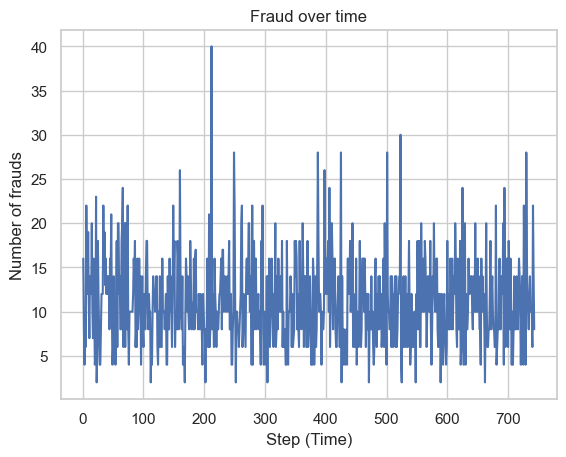

In [21]:
frauds_per_step=df[df["isFraud"]==1]["step"].value_counts().sort_index()
plt.plot(frauds_per_step.index,frauds_per_step.values,label="Fraud per step")
plt.xlabel("Step (Time)")
plt.ylabel("Number of frauds")
plt.title("Fraud over time")
plt.grid(True)
plt.show()

## It is not time dependent, hence no use

In [22]:
df.drop(columns="step",inplace=True)

In [23]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


## No of transaction of sender and reciever

In [24]:
top_sender=df["nameOrig"].value_counts().head(10)
top_sender

nameOrig
C1677795071    3
C1999539787    3
C724452879     3
C1976208114    3
C400299098     3
C1784010646    3
C1530544995    3
C1065307291    3
C545315117     3
C1902386530    3
Name: count, dtype: int64

In [25]:
top_reciever=df["nameDest"].value_counts().head(10)
top_reciever

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C1789550256     99
C451111351      99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [26]:
fraud_users=df[df["isFraud"]==1]["nameOrig"].value_counts().head(10)
fraud_users

nameOrig
C1280323807    1
C1305486145    1
C840083671     1
C1420196421    1
C2101527076    1
C1039979813    1
C2089752665    1
C1614818636    1
C40604503      1
C1970706589    1
Name: count, dtype: int64

### Fraud Types

In [27]:
fraud_types=df[df["type"].isin(["TRANSFER","CASH_OUT"])]

In [28]:
fraud_types["type"].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

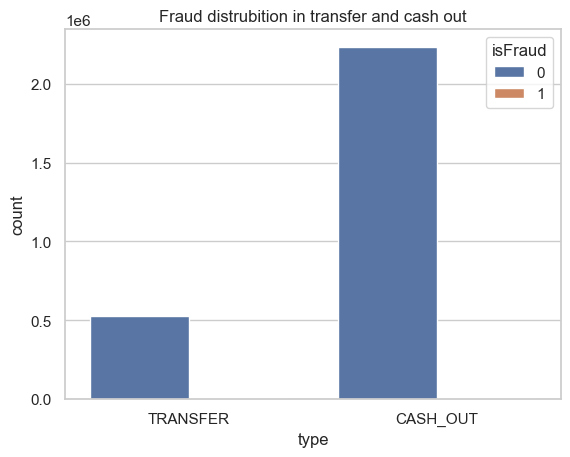

In [29]:
sns.countplot(data=fraud_types,x="type",hue="isFraud")
plt.title("Fraud distrubition in transfer and cash out")
plt.show()

In [30]:
corr=df[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud"]].corr()
corr


,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


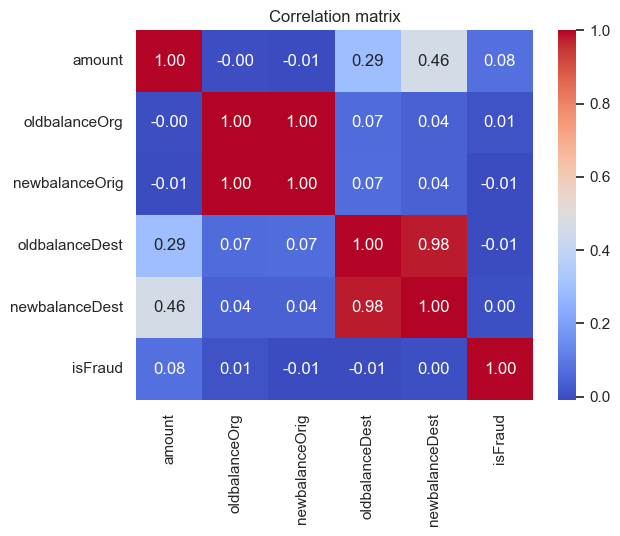

In [31]:
sns.heatmap(corr,annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation matrix")
plt.show()

### Customer whose balance goes to zero after transaction

In [32]:
zero_after_transfer=df[
    (df["oldbalanceOrg"]>0) &
    (df["newbalanceOrig"]==0) &
    df["type"].isin(["TRANSFER","CASH_OUT"])
]
zero_after_transfer

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0,181.00,0.00
3,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0,181.00,21182.00
15,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0,15325.00,-46430.44
19,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0,705.00,22425.00
24,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0,10835.00,-2712905.89
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0,339682.13,-339682.13
6362616,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0,6311409.28,0.00
6362617,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0,6311409.28,-6311409.27
6362618,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0,850002.52,0.00


In [33]:
zero_after_transfer["isFraud"].value_counts()

isFraud
0    1180062
1       8012
Name: count, dtype: int64

# Model Training


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold,cross_val_score

In [35]:
df_model=df.drop(["nameOrig","nameDest","isFlaggedFraud"],axis=1)
df_model

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,9839.64,0.00
1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,1864.28,0.00
2,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,181.00,0.00
3,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,181.00,21182.00
4,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,11668.14,0.00
...,...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1,339682.13,-339682.13
6362616,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1,6311409.28,0.00
6362617,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,6311409.28,-6311409.27
6362618,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1,850002.52,0.00


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 12 columns):
 #   Column           Dtype  
---  ------           -----  
 0   type             object 
 1   amount           float64
 2   nameOrig         object 
 3   oldbalanceOrg    float64
 4   newbalanceOrig   float64
 5   nameDest         object 
 6   oldbalanceDest   float64
 7   newbalanceDest   float64
 8   isFraud          int64  
 9   isFlaggedFraud   int64  
 10  balanceDiffOrig  float64
 11  balanceDiffDest  float64
dtypes: float64(7), int64(2), object(3)
memory usage: 582.5+ MB


In [37]:
categorical=["type"]
numerical=["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]

In [38]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [39]:
y=df_model["isFraud"]
X=df_model.drop("isFraud",axis=1)

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y)
# both train and test will keep the 95:5 ratio, so the model can learn and be evaluated fairly.

In [41]:
preprocessor=ColumnTransformer(
    transformers=[
        ("num",StandardScaler(),numerical),
        ("cat",OneHotEncoder(drop="first"),categorical)
    ],remainder="drop"
)

##  Defining model and hyperparameter grids

In [42]:

models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, class_weight="balanced"),
    "RandomForest": RandomForestClassifier(n_estimators=100, class_weight="balanced"),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1),
    "DecisionTree": DecisionTreeClassifier(max_depth=10, class_weight="balanced")
}


## Why use f1 score? Coz accuracy cannot be used in imbalanced dataset as it will get 99% accuracy just by predicted false

f1 is special case of f beta score - (1+b^2) (precision*recall)/(precision+recall) where beta =1 i.e. false positive and false negative both are important
F1 Score= 2× (Precision+Recall)/(Precision×Recall)

precision=  TP/(TP+FP)      out of all actual value how many are correctly predicted
Recall=     TP/(TP+FN)      out of all the predicted values how many are correctly prediced

F1 Score= 2× (Precision+Recall)/(Precision×Recall)
It rewards a model only when it correctly identifies fraud (positive class) while keeping false positives low
​
 




## Why Stratified k fold?

If we use regular KFold, it may randomly assign almost all fraud cases to one fold, leading to:

Training sets with almost no fraud (model doesn't learn)
Validation sets with no fraud (can’t evaluate)

StratifiedKFold solves this
It preserves the class ratio (e.g., 95:5 or 99:1) in each fold of the cross-validation.

In [46]:
results = {}

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    scores = cross_val_score(
        pipeline, X_train, y_train,
        cv=StratifiedKFold(n_splits=5),  
        scoring='f1',
        n_jobs=-1
    )
    
    results[name] = scores.mean()

print("\n📊 Model Comparison (F1-score):")
for name, score in results.items():
    print(f"{name}: F1 = {score:.4f}")


📊 Model Comparison (F1-score):
LogisticRegression: F1 = 0.0420
RandomForest: F1 = 0.8598
GradientBoosting: F1 = 0.5600
DecisionTree: F1 = 0.2517


 ### So Random forest performs the best

In [49]:
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])
pipeline

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [55]:
pipeline.fit(X_train,y_train)


,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [56]:
pipeline

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [57]:
y_pred=pipeline.predict(X_test)

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.97      0.79      0.87      2464

    accuracy                           1.00   1908786
   macro avg       0.98      0.89      0.93   1908786
weighted avg       1.00      1.00      1.00   1908786



### Fraud detection model with F1 = 0.87 for fraud class and 97% precision
79 percent of fraud were actually detected and 97 of predicted fraud were true

In [59]:
confusion_matrix(y_test,y_pred)

array([[1906260,      62],
       [    522,    1942]])

In [61]:
import joblib
joblib.dump(pipeline,"fraud_detection_pipeline.pkl")

['fraud_detection_pipeline.pkl']